## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](pandas.pydata.org/) is an important package for Python data analysis.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [jdc](https://alexhagen.github.io/jdc/) : Jupyter magic that allows defining classes over multiple jupyter notebook cells.

In [1]:
!pip install jdc

In [2]:
import numpy as np
import pandas as pd
import jdc
import matplotlib.pyplot as plt

## 2 - Problem Statement ##

You will create a neural network class - MultivariateNetwork:
    - initialize parameters, such as weights, learning rate, etc.
    - implement the gredient descent algorithm
    - implement the predict function to make predictions for new data sets
    - implement the normalization function
    

In [3]:
class MultivariateNetwork():
    def __init__(self, num_of_features=1, learning_rate=0.1):
        """
        This function creates a vector of zeros of shape (num_of_features, 1) for W and initializes w_0 to 0.

        Argument:
        num_of_features -- size of the W vector, i.e., the number of features, excluding the bias
        
        """
        # n is the number of features
        self.n = num_of_features
        # alpha is the learning rate
        self.alpha = learning_rate

        ### START YOUR CODE HERE ### 
        #initialize self.W and self.w_0 to be 0's
        self.W = np.zeros(shape=(self.n, 1))
        self.w_0 = 0
        ### YOUR CODE ENDS ###
        assert(self.W.shape == (self.n, 1))
        assert(isinstance(self.w_0, float) or isinstance(self.w_0, int))

## 3 - Gradient Descent ##

Forward Propagation:
- You get X
- You compute $h_{W}(X) = W^T * X + w_{0}\tag{1}$
- You calculate the cost function:  $$L(W) = \frac{1}{2m} \sum_{i=1}^{n} \left(h_{W}(x^{(i)})  - y^{(i)}\right)^2\tag{2}$$. 

Here are the two formulas you will be using: 

$$ dw_{j} =\frac{\partial L}{\partial w_{j}} = \frac{1}{m} \sum_{i=1}^m (( h_{W}(x^{(i)}) -y^{(i)}) * x_{j}^{(i)})\tag{3}$$
$$ dw_{0} = \frac{\partial L}{\partial w_{0}} = \frac{1}{m} \sum_{i=1}^m (h_{W}(x^{(i)}) -y^{(i)})\tag{4}$$

The weights will be updated:
$$ w_{j} = w_{j} - {\alpha} * \frac{\partial L}{\partial w_{j}}\tag{5}$$
 

In [4]:
%%add_to MultivariateNetwork
def fit(self, X, Y, epochs=1000, print_loss=True):
    """
    This function implements the Gradient Descent Algorithm
    Arguments:
    X -- training data matrix: each column is a training example. 
            The number of columns is equal to the number of training examples
    Y -- true "label" vector: shape (1, m)
    epochs --

    Return:
    params -- dictionary containing weights
    losses -- loss values of every 100 epochs
    grads -- dictionary containing dw and dw_0
    """
    losses = []

    # print("W.T.shape = ", self.W.T.shape)
    # print("X.shape = ", X.shape)
    # print("Y.shape = ", Y.shape)
    # print("W.shape = ", self.W.shape)

    # Get the number of training examples
    m = X.shape[1]
    
    for i in range(epochs):

      ### START YOUR CODE HERE ### 
      # Calculate the hypothesis outputs Y_hat (≈ 1 line of code)
      Y_hat = np.dot(self.W.T, X) + self.w_0 #correct 
      
      # Calculate loss (≈ 1 line of code)
      loss = (1/(2*m)) * np.dot((Y_hat - Y), (Y_hat - Y).T) #correct
      
      # Calculate the gredients for W and w_0 (≈ 2 lines of code)
      dw = np.sum((Y_hat - Y) * X)
      dw_0 = np.sum(Y_hat - Y)
      
      dw /= m
      dw_0 /= m

      # Weight updates (≈ 2 lines of code)
      self.W -= self.alpha * dw
      self.w_0 -= self.alpha * dw_0
      ### YOUR CODE ENDS ###
      
      if((i % 100) == 0):
        losses.append(loss)
        # Print the cost every 100 training examples
        if print_loss:
          print ("Cost after iteration %i: %f" %(i, loss))

    params = {
        "W": self.W,
        "w_0": self.w_0
    }

    grads = {
        "dw": dw,
        "dw_0": dw_0
    }

    return params, grads, losses

### Make Predictions ###
The predicted output is calculated as $h_{W}(X) = W^T * X + b$

In [5]:
%%add_to MultivariateNetwork
def predict(self, X):
    '''
    Predict the actual values using learned parameters (self.W, self.w_0)

    Arguments:
    X -- data of size (n x m)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    m = X.shape[1]
    # print("W.T shape = ", self.W.T.shape)
    # print("X shape = ", X.shape)
    
    Y_prediction = np.zeros((1,m))

    # Compute the actual values (≈ 1 line of code)
    ### START YOUR CODE HERE ### 
    Y_prediction = np.dot(self.W.T, X) + self.w_0 #see fit function
    #Y_prediction = self.W.T * X + self.w_0
    #Y_prediction = self.W * X + self.w_0

    ### YOUR CODE ENDS ###

    return Y_prediction

### Feature Scaling ###
Here you normalize features using:
$ \frac{x_{i} - mean}{\sigma}$, where $\sigma$ is the standard deviation

In [6]:
%%add_to MultivariateNetwork
def normalize(self, matrix):
    '''
    matrix: the matrix that needs to be normalized. Note that each column represents a training example. 
         The number of columns is the the number of training examples
    '''
    # Calculate mean for each feature
    # Pay attention to the value of axis = ?
    # set keepdims=True to avoid rank-1 array
    
    ### START YOUR CODE HERE ### 
    # calculate mean (1 line of code)
    mean = np.mean(matrix, axis = 1, keepdims=True) #fix along row 
    
    # calculate standard deviation (1 line of code)
    std = np.std(matrix, axis=1, keepdims=True) # axis = ! #fix axis
    
    # normalize the matrix based on mean and std
    matrix = (matrix - mean) / std
    ### YOUR CODE ENDS ###

    return matrix

### Run the Experiments

In [7]:
# GRADED FUNCTION: model

def Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 2000, learning_rate = 0.5, print_loss = False):
    """
    Builds the multivariate linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) 
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_loss -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    num_of_features = X_train.shape[0]
    model = MultivariateNetwork(num_of_features, learning_rate)
    
    
    ### START YOUR CODE HERE ###
    # Obtain the parameters, gredients, and losses by calling a model's method (≈ 1 line of code)
    parameters, grads, losses = model.fit(X_train, Y_train, epochs, print_loss)
    ### YOUR CODE ENDS ###
    
    ### START YOUR CODE HERE ###
    # Predict test/train set examples (≈ 2 lines of code)
    print("Y_Test shape = ", Y_test.shape)
    Y_prediction_test = model.predict(X_test)
    Y_prediction_train = model.predict(X_train)
    ### YOUR CODE ENDS ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)/Y_train) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)/Y_test) * 100))

    W = parameters['W']
    w_0 = parameters['w_0']
    print("W is " + str(W))
    print("w_0 is " + str(w_0))
    
    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "w_0" : w_0,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

### Load Data and Start the Learning Process ###
You can change num_iterations and learning_rate to see the learning process

In [8]:
df = pd.read_csv('prj2data1.csv', header=None)
X_train = df[[0, 1]].values.T
Y_train = df[2].values.reshape(-1, 1).T


df_test = pd.read_csv('prj2data1_test.csv', header=None)
X_test = df_test[[0, 1]].values.T
Y_test = df_test[2].values.reshape(-1, 1).T #one row by n columns 

### Plot the learning curve ###

Cost after iteration 0: 370.221964
Cost after iteration 100: 1.886501
Cost after iteration 200: 1.621351
Cost after iteration 300: 1.426048
Cost after iteration 400: 1.282193
Cost after iteration 500: 1.176233
Cost after iteration 600: 1.098186
Cost after iteration 700: 1.040698
Cost after iteration 800: 0.998354
Cost after iteration 900: 0.967165
Y_Test shape =  (1, 7)
train accuracy: 94.66597295963908 %
test accuracy: 96.76735093911383 %
W is [[2.91416503]
 [2.91416503]]
w_0 is 3.6633405286198526


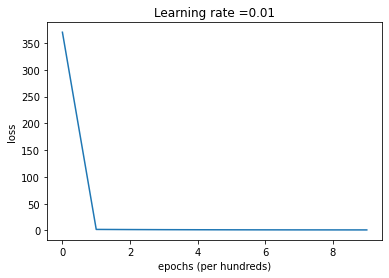

In [9]:
d = Run_Experiment(X_train, Y_train, X_test, Y_test, epochs = 1000, learning_rate = 0.01, print_loss = True)

# Plot learning curve (with costs)
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()